In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

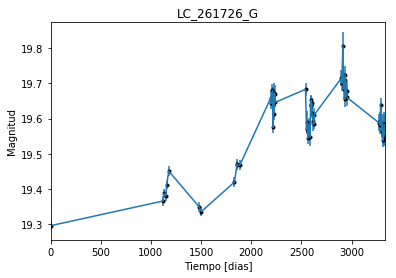

In [2]:
data = np.genfromtxt('LC_261726_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_261726_G')
plt.savefig("LC_261726_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

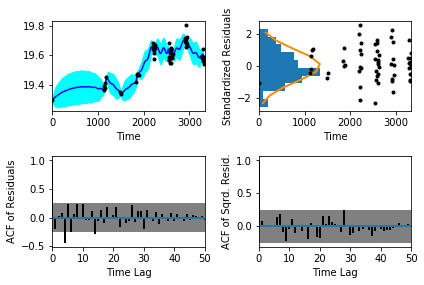

In [5]:
sample.assess_fit()

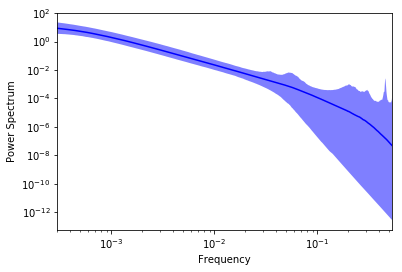

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

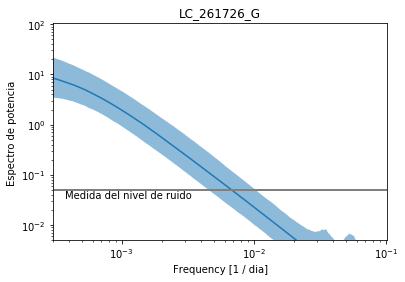

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_261726_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_261726_G')

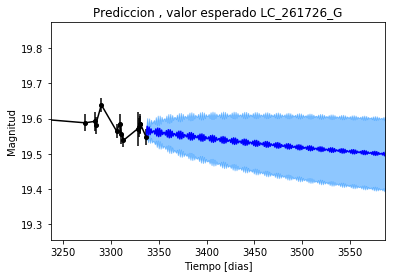

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_261726_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_261726_G')

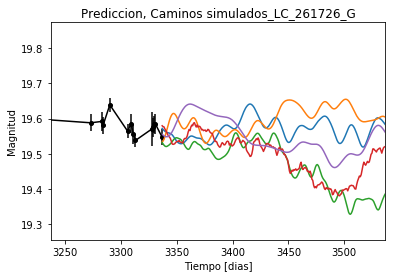

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_261726_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


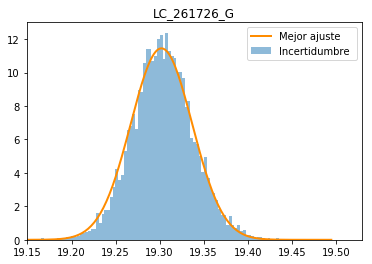

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_261726_G')
plt.savefig("Mejor_ajuste_LC_261726_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_261726_G')

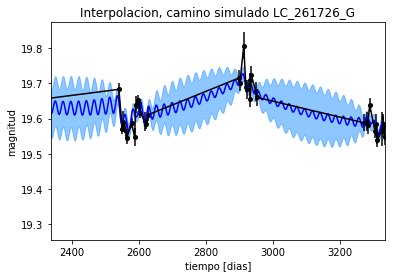

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_261726_G')

Text(0.5,1,'Interpolacion, camino simulado LC_261726_G')

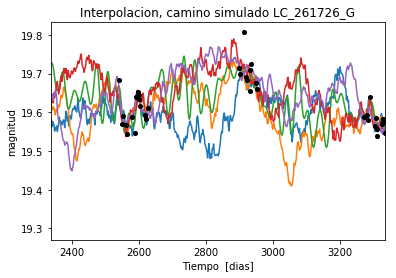

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_261726_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 867.254853308
Median: 0.0168286904974
Standard deviation: 0.178663148017
68% credibility interval: [ 0.00254386  0.14345035]
95% credibility interval: [  4.65040295e-04   7.22596647e-01]
99% credibility interval: [  3.29952439e-04   9.67706742e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 772.137094767
Median: 0.0136969889869
Standard deviation: 0.135422668258
68% credibility interval: [ 0.00155657  0.08775402]
95% credibility interval: [  3.68334404e-04   5.10949759e-01]
99% credibility interval: [  3.17813579e-04   8.51284799e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 376.203155675
Median: 0.159960543217
St

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2626.16610316
Median: 133.151339757
Standard deviation: 2.07257025472
68% credibility interval: [ 131.12617543  134.63195417]
95% credibility interval: [ 128.43083239  137.83342668]
99% credibility interval: [ 126.04688112  138.81974998]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 469.791482967
Median: 1.73229470056
Standard deviation: 2.69804623767
68% credibility interval: [ 0.40729477  5.31772158]
95% credibility interval: [ 0.11338293  9.63600576]
99% credibility interval: [  0.05343359  13.82502393]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 387.736885079
Median: 3.99418379745
Standard deviation: 14.6085596864
68% credibility interval: [  0.31160025  23.39439827]
95% credibility interval: [  0.06454547 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20029.2912945
Median: 3.23195159845e-44
Standard deviation: 2.39329047728e+104
68% credibility interval: [  2.87494769e-77   6.93587133e-09]
95% credibility interval: [  1.05953185e-131   2.19153164e+000]
99% credibility interval: [  2.25149460e-140   1.64525666e+064]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1453.0770678
Median: 19.4818860861
Standard deviation: 0.065573516822
68% credibility interval: [ 19.41974546  19.54243461]
95% credibility interval: [ 19.35055303  19.6142107 ]
99% credibility interval: [ 19.29338322  19.66590185]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 564.950355335
Median: 0.22447973292
Standard deviation: 0.295677199119
68% credibility interval: [ 0.04086017  0.68374181]
95% credibility interval: [ 0.          0.99093943]
99% credibility interval: [ 0.          1.04400788]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 564.950355335
Median: 0.22447973292
Standard deviation: 0.295677199119
68% credibility interval: [ 0.04086017  0.68374181]
95% credibility interval: [ 0.          0.99093943]
99% credibility interval: [ 0.          1.04400788]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1505.27073811
Median: 0.0
Standard deviation: 0.000139033014265
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2626.16610316
Median: 133.151339757
Standard deviation: 2.07257025472
68% credibility interval: [ 131.12617543  134.63195417]
95% credibility interval: [ 128.43083239  137.83342668]
99% credibility interval: [ 126.04688112  138.81974998]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1027.1252586
Median: 0.0174324816377
Standard deviation: 0.0104956067893
68% credibility interval: [ 0.01214797  0.0265695 ]
95% credibility interval: [ 0.00872962  0.04182468]
99% credibility interval: [ 0.00701926  0.06319435]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1093.65617146
Median: 1.15088938122
Standard deviation: 0.217249214361
68% credibility interval: [ 0.94928529  1.38160455]
95% credibility interval: [ 0.77677384  1.64365836]
99% credibility interval: [ 0.71220313  1.80961891]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 466.729476028
Median: 0.0246434234795
Standard deviation: 0.354930806315
68% credibility interval: [ 0.00067639  0.25582205]
95% credibility interval: [  3.40176247e-05   1.22062595e+00]
99% credibility interval: [  1.31909424e-65   2.24277036e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 867.254853308
Median: (-0.105737780872-0.665988862538j)
Standard deviation: 2.17061570433
68% credibility interval: [-0.90132511-1.23188322j -0.01598354-0.29812867j]
95% credibility interval: [ -4.54020864e+00-3.48633926j  -2.92193435e-03-6.27781569j]
99% credibility interval: [ -6.08028078e+00-4.84729068j  -2.07315232e-03-4.79479118j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 772.137094767
Median: (-0.0860607199548+1.37602808681j)
Standard deviation: 2.04338136593
68% credibility interval: [-0.55137480+1.46537274j -0.00978024+0.46846773j]
95% credibility interval: [ -3.21039202e+00+5.05386499j  -2.31431331e-03+2.89172786j]
99% credibility interval: [ -5.34878014e+00+2.04811396j  -1.99688161e-03+1.90930854j]
Post